In [1]:
# These libraries will be used for EDA and data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [117]:
pd.set_option('display.max_columns', 100) # shows all the columns
df = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/All_Features.csv').reset_index().rename(columns = {'index' : 'Index'})

In [80]:
merged = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Merged_train.csv')

/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (31,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
merged_1 = merged.groupby('Provider')['Type'].value_counts().to_frame().rename(columns = {'Type' : 'Count'}).reset_index()
merged_1 = merged_1.pivot(index='Provider', columns='Type', values='Count').fillna(0).astype('int64')
merged_1

Type,Inpatient,Outpatient
Provider,,
PRV51001,5,20
PRV51003,62,70
PRV51004,0,149
PRV51005,0,1165
PRV51007,3,69
...,...,...
PRV57759,0,28
PRV57760,0,22
PRV57761,0,82


In [152]:
merged[merged.PotentialFraud == 'Yes'].BeneID.nunique()

83997

In [149]:
merged[merged.PotentialFraud == 'No'].BeneID.nunique()

113627

In [168]:
83997/(83997 + 113627)

0.425034408776262

In [153]:
113627/(83997 + 113627)

0.574965591223738

In [154]:
Final_Features.loc[Final_Features.PotentialFraud == 'Yes'].Provider.nunique()

506

In [155]:
Final_Features.loc[Final_Features.PotentialFraud == 'No'].Provider.nunique()

4904

In [157]:
4904/5410

0.9064695009242144

In [160]:
Final_Features.loc[Final_Features.PotentialFraud == 'Yes'].Inpatient.sum()

23402

In [158]:
Final_Features.loc[Final_Features.PotentialFraud == 'No'].Inpatient.sum()

17072

In [164]:
23402/(23402 + 17072) # Fraud

0.5781983495577407

In [165]:
17072/(23402 + 17072) # Not Fraud

0.4218016504422592

In [161]:
Final_Features.loc[Final_Features.PotentialFraud == 'Yes'].Outpatient.sum()

189394

In [163]:
Final_Features.loc[Final_Features.PotentialFraud == 'No'].Outpatient.sum()

328343

In [166]:
189394/(189394 + 328343) # Fraud

0.36581121302900893

In [167]:
328343/(189394 + 328343) # Not Fraud

0.634188786970991

In [100]:
Final_Features = df[['Provider', 'PotentialFraud', 'Payment_Total', 'Hos_Stay_Total', 'DiagGroupCode', 'Claim_Len_Total', 'CDC_2724', 'CDC_42731', 'CDC_25000', 
 'CDC_4280', 'CDC_2449', 'CPC_4019.0', 'Male_Patient', 'CDC_4019', 'stroke', 'KidneyDisease', 'Race_White', 'County_Count', 'CPC_2724.0', 'IschemicHeart',
 'ObstrPulmonary', 'Age(81-100)', 'rheumatoidarthritis', 'CPC_66.0', 'Age(61-80)']].reset_index().rename(columns = {'index' : 'Index'})
Final_Features = Final_Features.merge(merged_1, on = 'Provider')
Final_Features

,Index,Provider,PotentialFraud,Payment_Total,Hos_Stay_Total,DiagGroupCode,Claim_Len_Total,CDC_2724,CDC_42731,CDC_25000,CDC_4280,CDC_2449,CPC_4019.0,Male_Patient,CDC_4019,stroke,KidneyDisease,Race_White,County_Count,CPC_2724.0,IschemicHeart,ObstrPulmonary,Age(81-100),rheumatoidarthritis,CPC_66.0,Age(61-80),Inpatient,Outpatient
0,0,PRV51001,No,109980.0,25.0,5.0,36,2,2,1,0,1,0,9.0,3,6,17,20.0,7,1,23,10,10.0,8,0,11.0,5,20
1,1,PRV51003,Yes,671956.0,320.0,58.0,485,16,11,15,14,12,3,49.0,25,12,64,94.0,28,1,112,41,22.0,38,1,63.0,62,70
2,2,PRV51004,No,52480.0,0.0,0.0,213,12,3,8,1,8,0,45.0,22,17,50,113.0,33,0,108,41,37.0,46,0,78.0,0,149
3,3,PRV51005,Yes,284610.0,0.0,0.0,1268,74,23,54,18,30,0,208.0,140,124,507,382.0,27,0,895,295,108.0,331,0,280.0,0,1165
4,4,PRV51007,No,36974.0,16.0,3.0,69,5,2,6,1,6,0,27.0,10,12,22,47.0,6,0,51,16,9.0,22,0,36.0,3,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,5405,PRV57759,No,10770.0,0.0,0.0,60,0,0,3,1,1,0,13.0,3,4,15,19.0,2,0,28,11,5.0,9,0,17.0,0,28
5406,5406,PRV57760,No,4770.0,0.0,0.0,7,1,1,2,0,1,0,6.0,3,0,2,7.0,3,0,22,2,1.0,1,0,5.0,0,22
5407,5407,PRV57761,No,18840.0,0.0,0.0,114,2,2,2,0,4,0,33.0,10,10,40,58.0,2,0,62,30,21.0,24,0,39.0,0,82
5408,5408,PRV57762,No,1900.0,0.0,0.0,0,0,0,0,0,0,0,1.0,0,0,1,1.0,1,0,1,1,0.0,0,0,1.0,0,1


In [111]:
Final_Features.groupby('PotentialFraud')['Inpatient'].agg('sum')/(17072 + 23402)

PotentialFraud
No     0.421802
Yes    0.578198
Name: Inpatient, dtype: float64

In [113]:
Final_Features.groupby('PotentialFraud')['Outpatient'].agg('sum')/(328343 + 189394)

PotentialFraud
No     0.634189
Yes    0.365811
Name: Outpatient, dtype: float64

In [20]:
Fraud = df.loc[df.PotentialFraud == 'Yes'].corr().unstack().drop_duplicates().\
to_frame().reset_index().rename(columns = {'level_0' : 'Feature1', 'level_1' : 'Feature2', 0 : 'Corr_Coef'}).sort_values(ascending = False, by = 'Corr_Coef')
Fraud.head(40)

,Feature1,Feature2,Corr_Coef
0,Index,Index,1.000000
1676,Diabetes,IschemicHeart,0.999344
1626,Heartfailure,IschemicHeart,0.998905
1625,Heartfailure,Diabetes,0.998890
1667,Depression,Diabetes,0.998363
1612,Alzheimer,Diabetes,0.998023
1668,Depression,IschemicHeart,0.998007
1613,Alzheimer,IschemicHeart,0.997896
1624,Heartfailure,Depression,0.997711
1621,Heartfailure,KidneyDisease,0.997623


In [19]:
NFraud = df.loc[df.PotentialFraud == 'No'].corr().unstack().drop_duplicates().\
to_frame().reset_index().rename(columns = {'level_0' : 'Feature1', 'level_1' : 'Feature2', 0 : 'Corr_Coef'}).sort_values(ascending = False, by = 'Corr_Coef')
NFraud.head(40)

,Feature1,Feature2,Corr_Coef
0,Index,Index,1.000000
1676,Diabetes,IschemicHeart,0.997403
1626,Heartfailure,IschemicHeart,0.996281
1625,Heartfailure,Diabetes,0.995883
1363,Female_Patient,Age(61-80),0.993114
1667,Depression,Diabetes,0.992857
1365,Female_Patient,Race_White,0.992810
1668,Depression,IschemicHeart,0.992658
1337,Male_Patient,Age(61-80),0.992476
1637,KidneyDisease,Diabetes,0.992390


In [8]:
 plt.rcParams["figure.figsize"] = [20, 6]

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text yticklabel objects>)

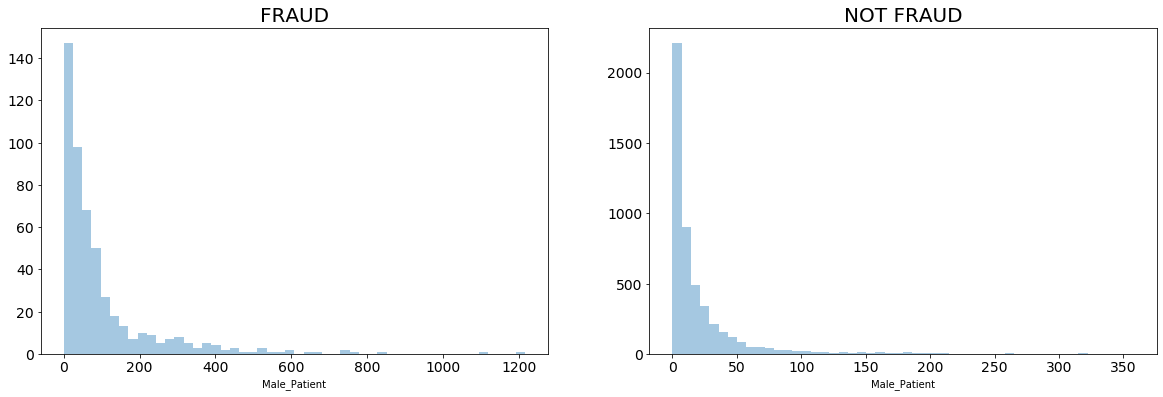

In [40]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df.loc[df.PotentialFraud == 'Yes']['Male_Patient'], kde = False) 
plt.title('FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.figure(1)
plt.subplot(1, 2, 2)
sns.distplot(df.loc[df.PotentialFraud == 'No']['Male_Patient'], kde = False)
plt.title('NOT FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 <a list of 10 Text yticklabel objects>)

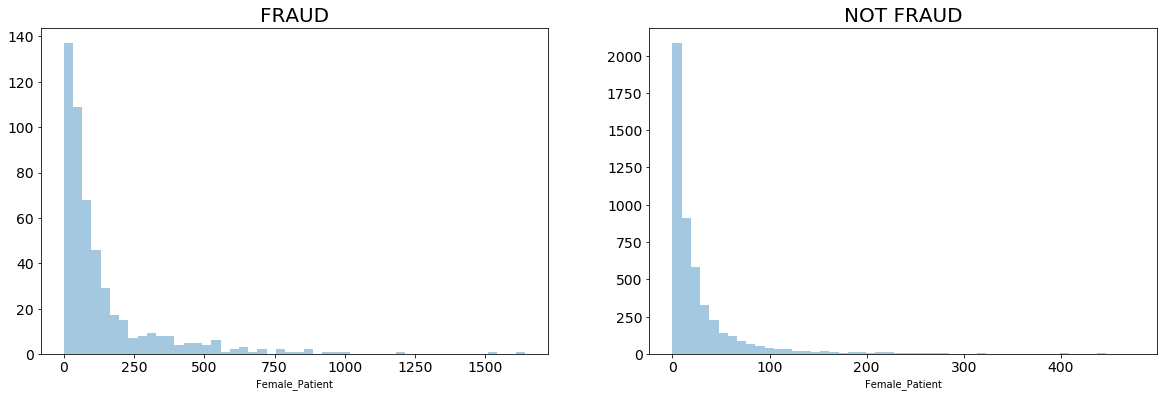

In [39]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df.loc[df.PotentialFraud == 'Yes']['Female_Patient'], kde = False) 
plt.title('FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.figure(1)
plt.subplot(1, 2, 2)
sns.distplot(df.loc[df.PotentialFraud == 'No']['Female_Patient'], kde = False)
plt.title('NOT FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text yticklabel objects>)

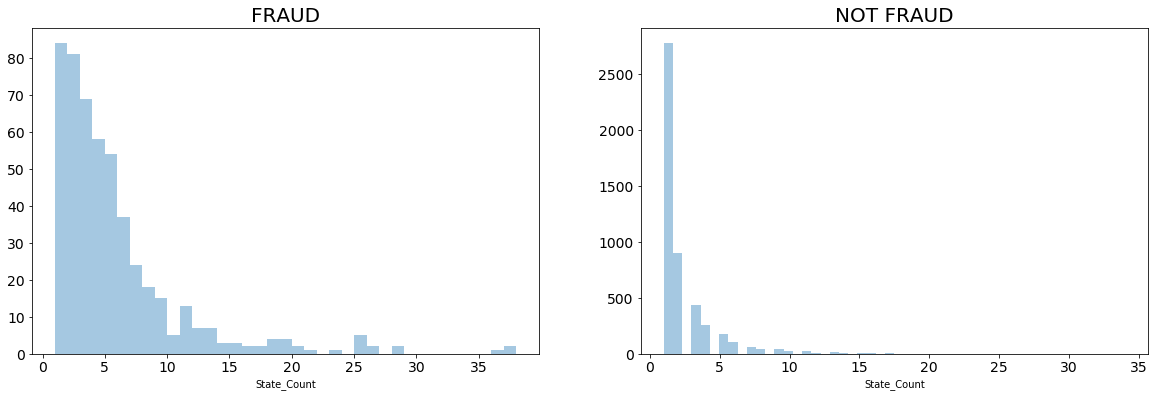

In [41]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df.loc[df.PotentialFraud == 'Yes']['State_Count'], kde = False) 
plt.title('FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.figure(1)
plt.subplot(1, 2, 2)
sns.distplot(df.loc[df.PotentialFraud == 'No']['State_Count'], kde = False)
plt.title('NOT FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text yticklabel objects>)

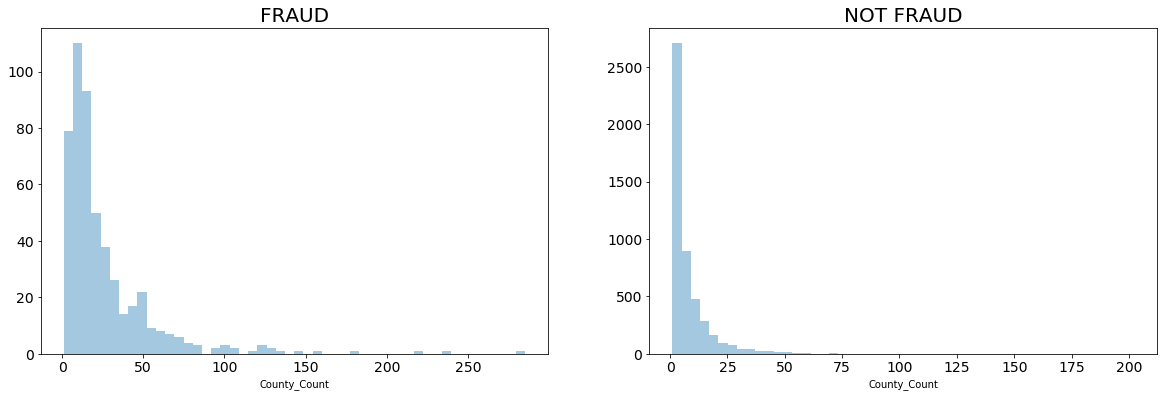

In [42]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df.loc[df.PotentialFraud == 'Yes']['County_Count'], kde = False) 
plt.title('FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.figure(1)
plt.subplot(1, 2, 2)
sns.distplot(df.loc[df.PotentialFraud == 'No']['County_Count'], kde = False)
plt.title('NOT FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text yticklabel objects>)

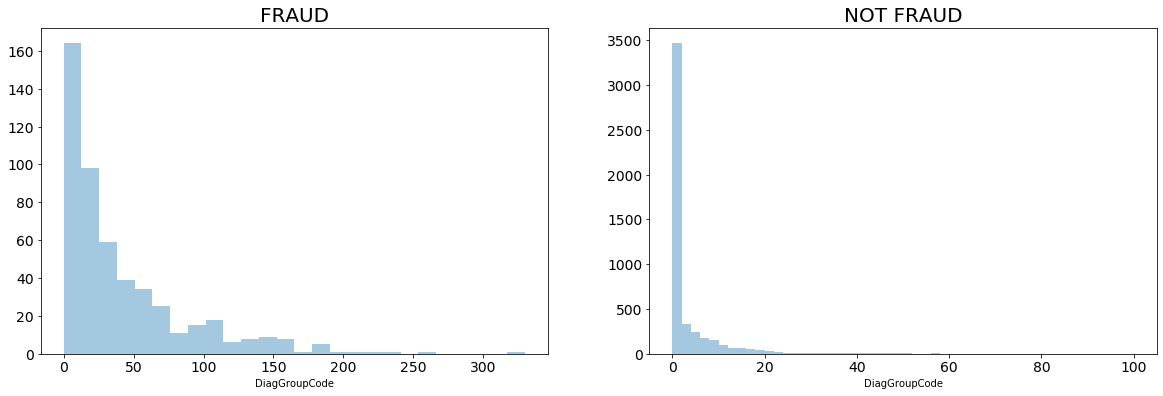

In [43]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df.loc[df.PotentialFraud == 'Yes']['DiagGroupCode'], kde = False) 
plt.title('FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.figure(1)
plt.subplot(1, 2, 2)
sns.distplot(df.loc[df.PotentialFraud == 'No']['DiagGroupCode'], kde = False)
plt.title('NOT FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text yticklabel objects>)

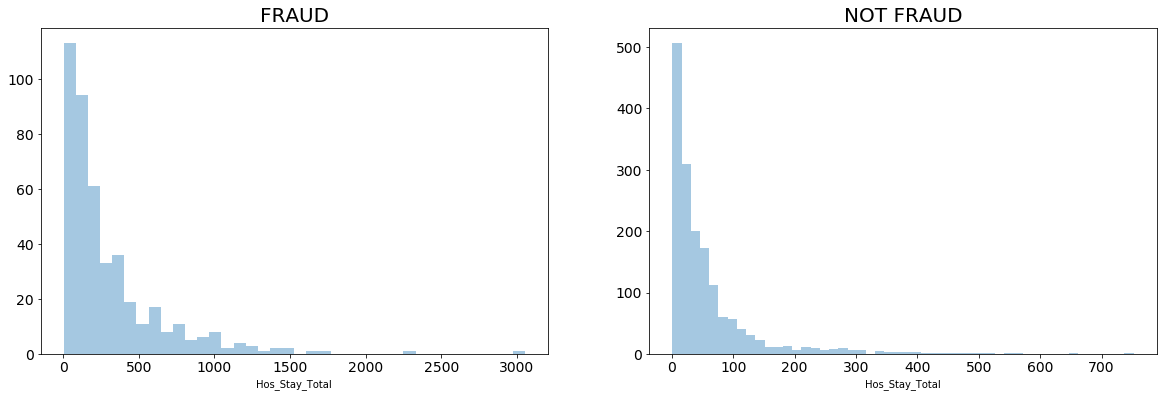

In [76]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df.loc[ (df.PotentialFraud == 'Yes') & (df.Hos_Stay_Total > 0) ]['Hos_Stay_Total'], kde = False) 
plt.title('FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.figure(1)
plt.subplot(1, 2, 2)
sns.distplot(df.loc[ (df.PotentialFraud == 'No') & (df.Hos_Stay_Total > 0) ]['Hos_Stay_Total'], kde = False)
plt.title('NOT FRAUD', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd105eb2fd0>,
      dtype=object)

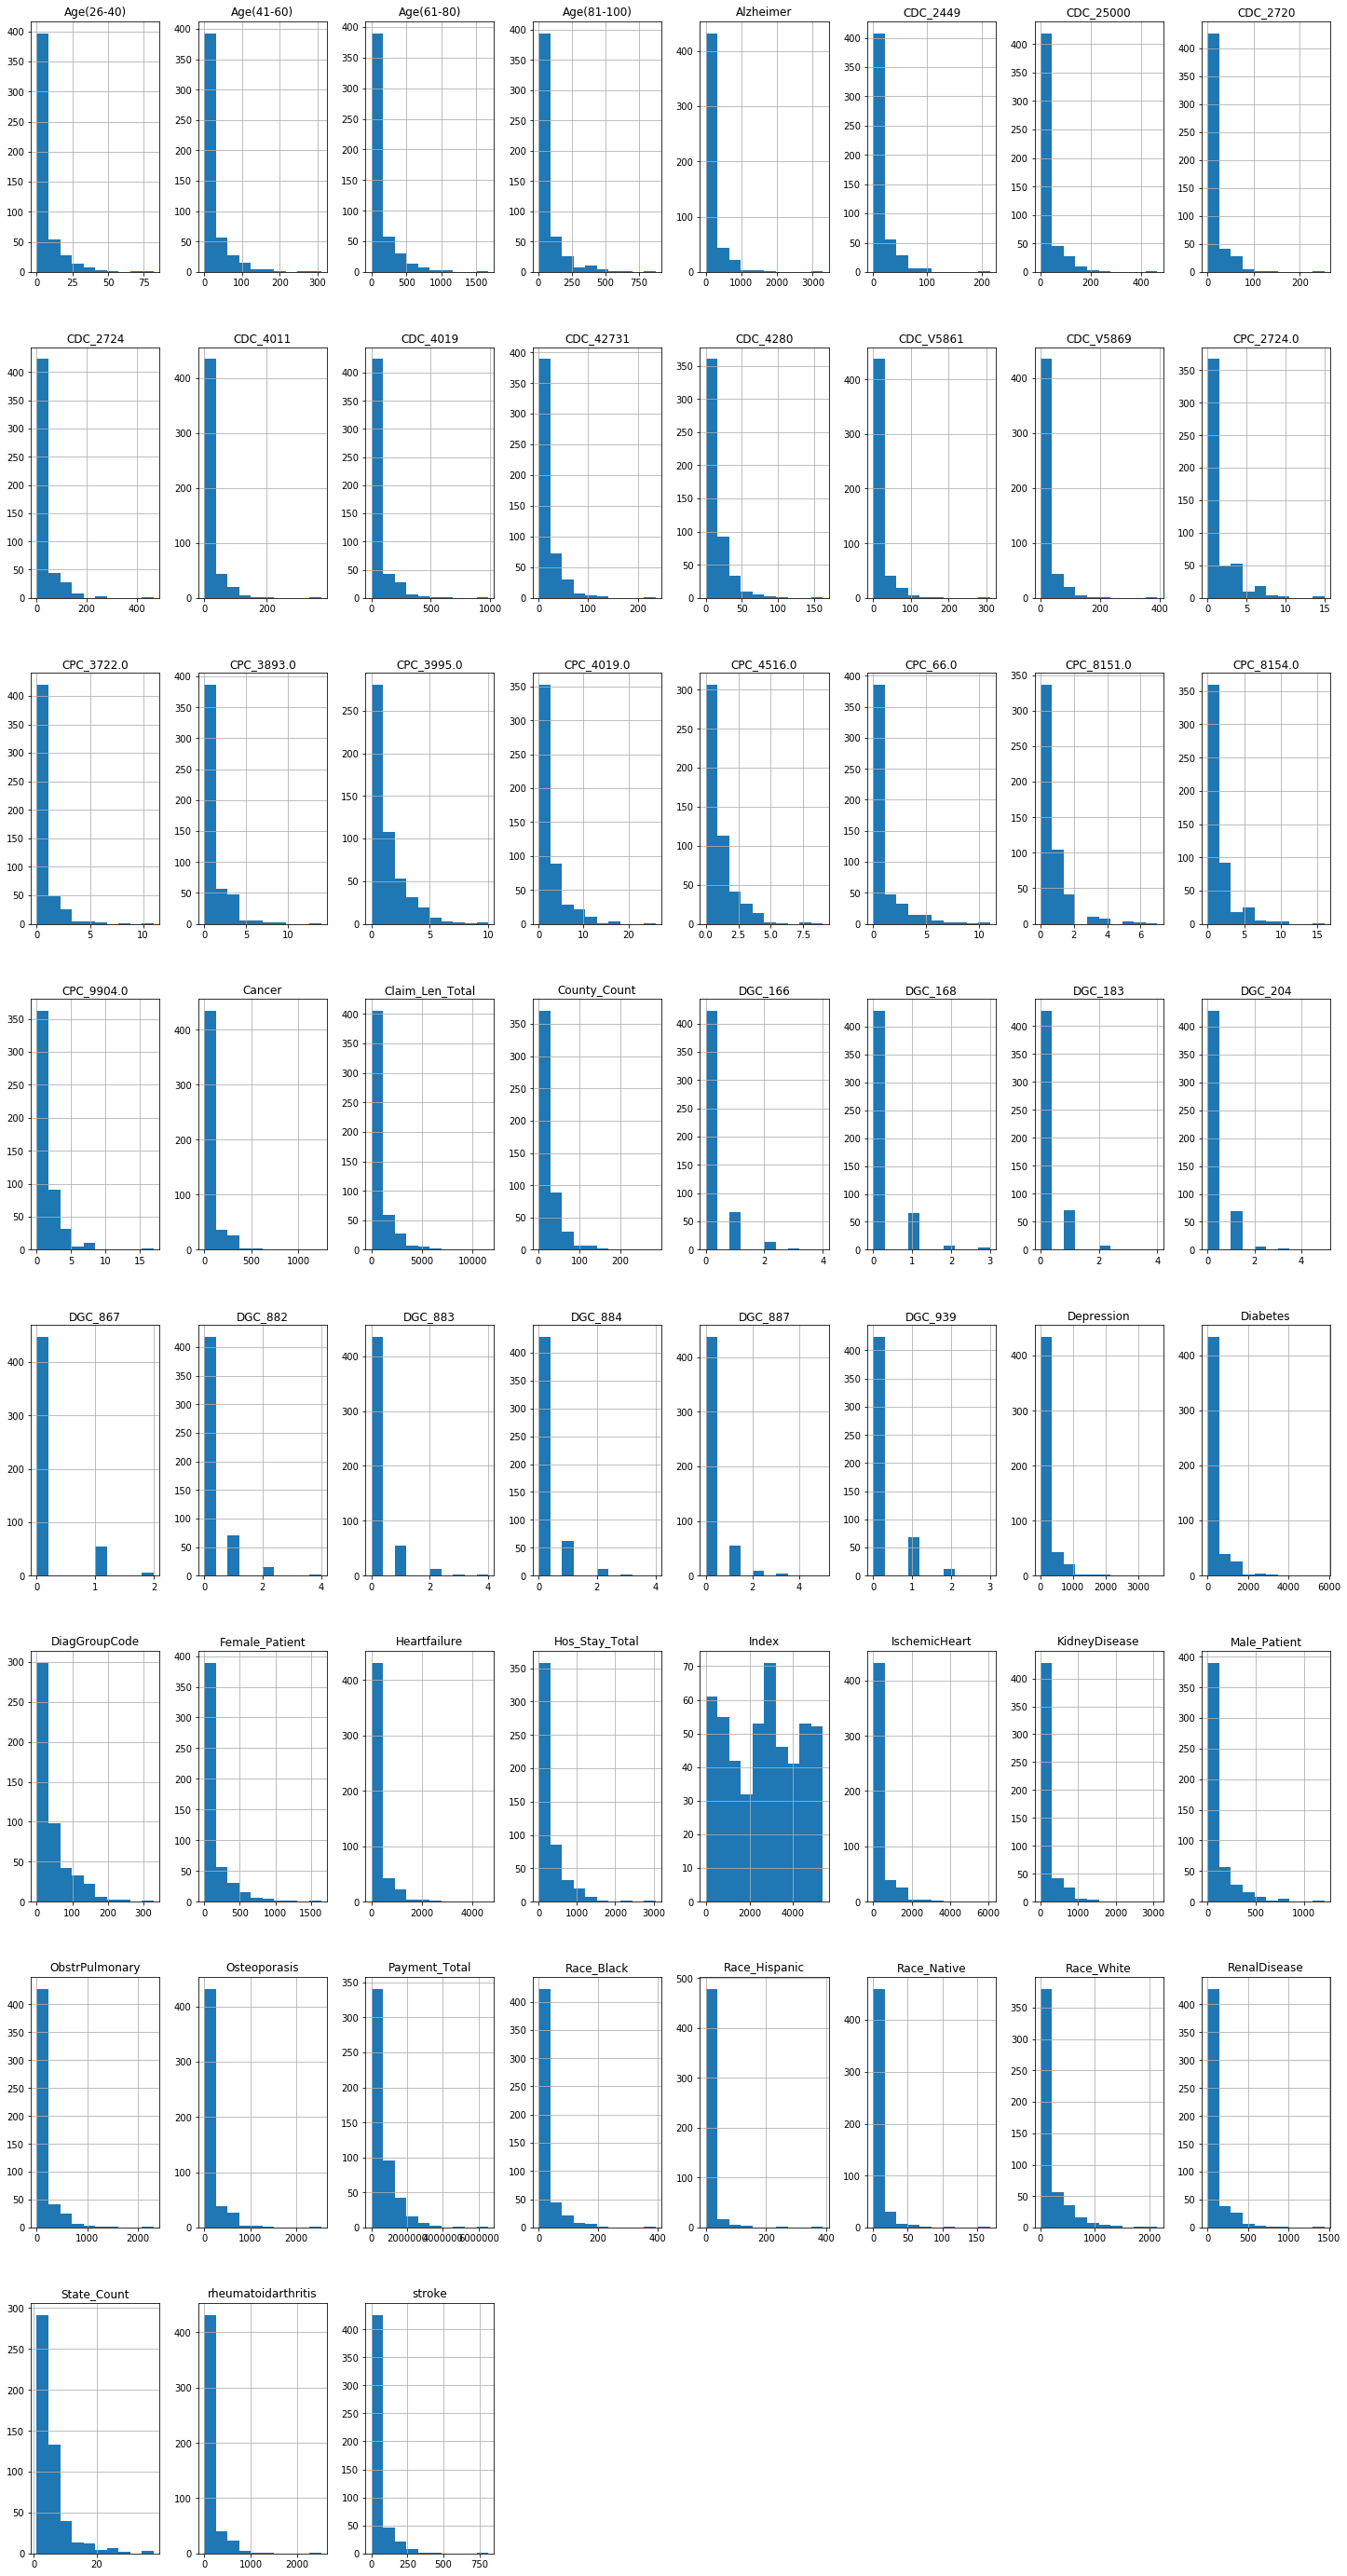

In [56]:
plt.rcParams["figure.figsize"] = [25, 50]
df.loc[df.PotentialFraud == 'Yes'].hist()

Text(0.5, 1.0, 'Distribution of Payment per Provider')

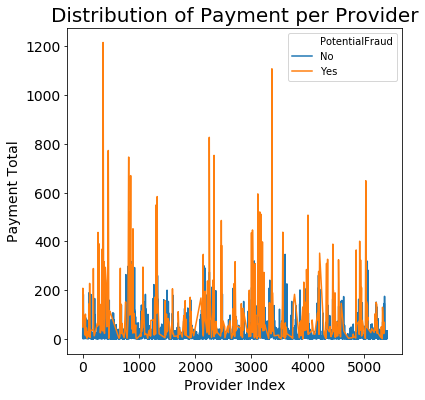

In [169]:
plt.rcParams["figure.figsize"] = [6, 6]
sns.lineplot(x = 'Index', y = 'Male_Patient', data = df, hue = 'PotentialFraud')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Provider Index', fontsize = 14)
plt.ylabel('Payment Total', fontsize = 14)
plt.title('Distribution of Payment per Provider', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Total Payment per Provider')

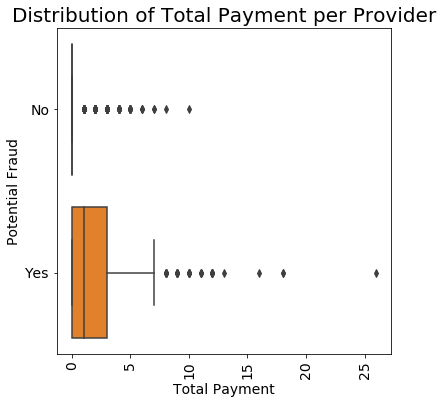

In [172]:
plt.rcParams["figure.figsize"] = [6, 6]
sns.boxplot(x = 'CPC_4019.0', data = df, y = 'PotentialFraud')
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.xlabel('Total Payment', fontsize = 14)
plt.ylabel('Potential Fraud', fontsize = 14)
plt.title('Distribution of Total Payment per Provider', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Count of Hospital Stay per Provider')

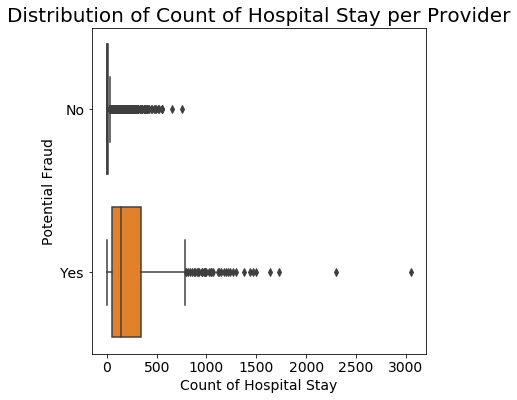

In [173]:
plt.rcParams["figure.figsize"] = [6, 6]
sns.boxplot(x = 'Hos_Stay_Total', data = df, y = 'PotentialFraud')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Count of Hospital Stay', fontsize = 14)
plt.ylabel('Potential Fraud', fontsize = 14)
plt.title('Distribution of Count of Hospital Stay per Provider', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Count of Diagnosis Group Code per Provider')

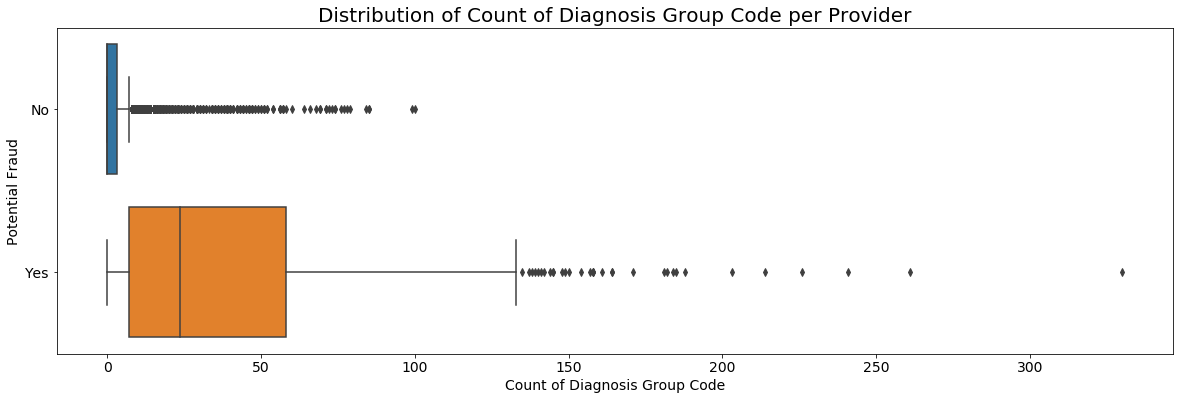

In [140]:
plt.rcParams["figure.figsize"] = [20, 6]
sns.boxplot(x = 'DiagGroupCode', data = df, y = 'PotentialFraud')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Count of Diagnosis Group Code', fontsize = 14)
plt.ylabel('Potential Fraud', fontsize = 14)
plt.title('Distribution of Count of Diagnosis Group Code per Provider', fontsize = 20)

In [109]:
Final_Features.shape[0]

5410

Text(0.5, 1.0, 'Distribution of Count of Claim Length Total per Provider')

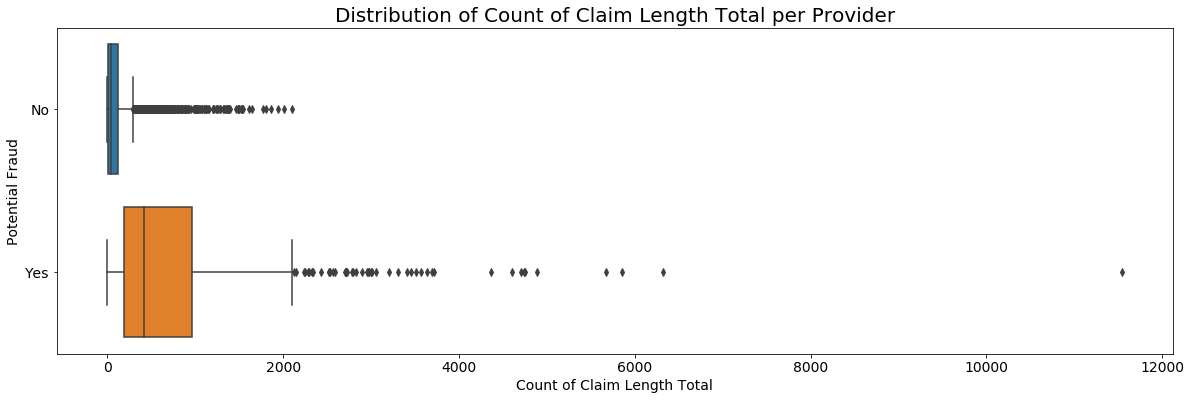

In [139]:
plt.rcParams["figure.figsize"] = [20, 6]
sns.boxplot(x = 'Claim_Len_Total', data = df, y = 'PotentialFraud')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Count of Claim Length Total', fontsize = 14)
plt.ylabel('Potential Fraud', fontsize = 14)
plt.title('Distribution of Count of Claim Length Total per Provider', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Count of CDC_2724 per Provider')

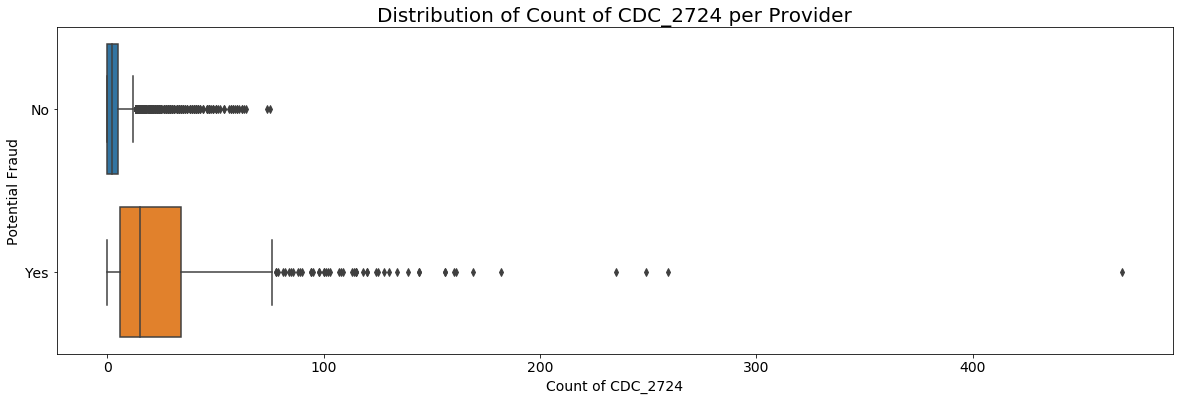

In [138]:
plt.rcParams["figure.figsize"] = [20, 6]
sns.boxplot(x = 'CDC_2724', data = df, y = 'PotentialFraud')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Count of CDC_2724', fontsize = 14)
plt.ylabel('Potential Fraud', fontsize = 14)
plt.title('Distribution of Count of CDC_2724 per Provider', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Count of Male Patient per Provider')

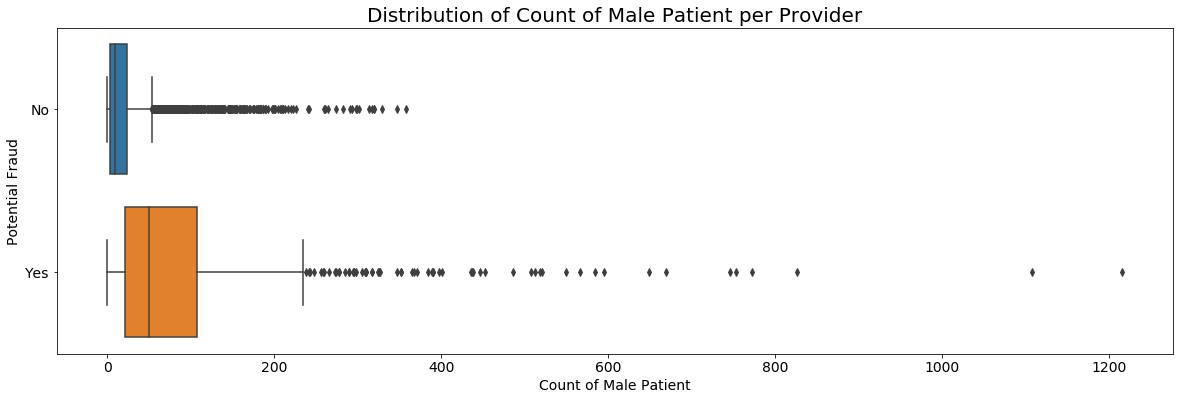

In [137]:
plt.rcParams["figure.figsize"] = [20, 6]
sns.boxplot(x = 'Male_Patient', data = df, y = 'PotentialFraud')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Count of Male Patient', fontsize = 14)
plt.ylabel('Potential Fraud', fontsize = 14)
plt.title('Distribution of Count of Male Patient per Provider', fontsize = 20)

Text(0.5, 1.0, 'Distribution of County Count per Provider')

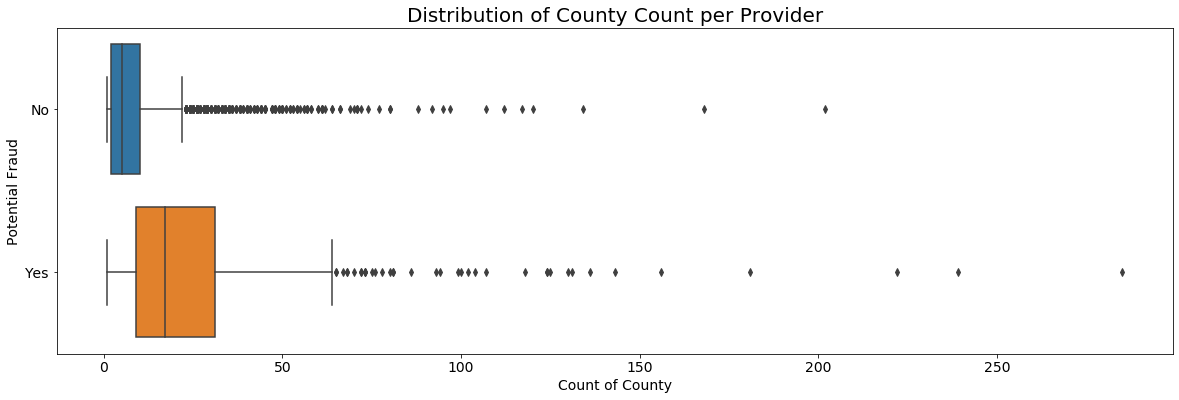

In [136]:
plt.rcParams["figure.figsize"] = [20, 6]
sns.boxplot(x = 'County_Count', data = df, y = 'PotentialFraud')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Count of County', fontsize = 14)
plt.ylabel('Potential Fraud', fontsize = 14)
plt.title('Distribution of County Count per Provider', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Count of Age(61-80) per Provider')

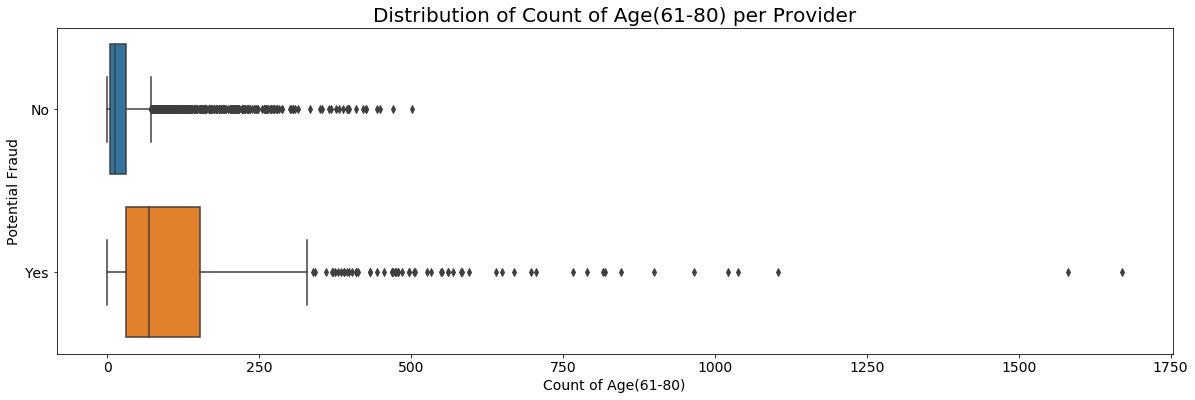

In [143]:
plt.rcParams["figure.figsize"] = [20, 6]
sns.boxplot(x = 'Age(61-80)', data = df, y = 'PotentialFraud')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Count of Age(61-80)', fontsize = 14)
plt.ylabel('Potential Fraud', fontsize = 14)
plt.title('Distribution of Count of Age(61-80) per Provider', fontsize = 20)

Text(0.5, 1.0, 'Distribution of rheumatoidarthritis per Provider')

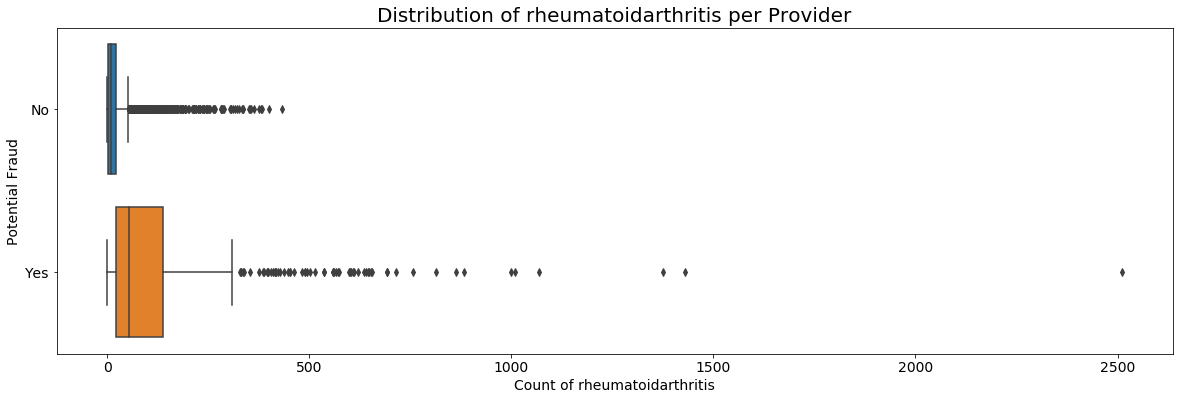

In [134]:
plt.rcParams["figure.figsize"] = [20, 6]
sns.boxplot(x = 'rheumatoidarthritis', data = df, y = 'PotentialFraud')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Count of rheumatoidarthritis', fontsize = 14)
plt.ylabel('Potential Fraud', fontsize = 14)
plt.title('Distribution of rheumatoidarthritis per Provider', fontsize = 20)

In [126]:
Final_Features.columns

Index(['Index', 'Provider', 'PotentialFraud', 'Payment_Total',
       'Hos_Stay_Total', 'DiagGroupCode', 'Claim_Len_Total', 'CDC_2724',
       'CDC_42731', 'CDC_25000', 'CDC_4280', 'CDC_2449', 'CPC_4019.0',
       'Male_Patient', 'CDC_4019', 'stroke', 'KidneyDisease', 'Race_White',
       'County_Count', 'CPC_2724.0', 'IschemicHeart', 'ObstrPulmonary',
       'Age(81-100)', 'rheumatoidarthritis', 'CPC_66.0', 'Age(61-80)',
       'Inpatient', 'Outpatient'],
      dtype='object')

In [70]:
Final_Features.loc[Final_Features.PotentialFraud == 'Yes'].describe(percentiles = [.05, .25, .5, .75, .95])

,Index,Payment_Total,Hos_Stay_Total,DiagGroupCode,Claim_Len_Total,CDC_2724,CDC_42731,CDC_25000,CDC_4280,CDC_2449,CPC_4019.0,Male_Patient,CDC_4019,stroke,KidneyDisease,Race_White,County_Count,CPC_2724.0,IschemicHeart,ObstrPulmonary,Age(81-100),rheumatoidarthritis,CPC_66.0,Age(61-80)
count,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2658.828063,6.337103e+05,265.571146,41.403162,801.944664,29.031621,17.189723,29.816206,14.061265,14.379447,2.250988,102.841897,61.322134,44.260870,177.563241,203.031621,26.179842,1.266798,321.169960,134.600791,70.411067,132.100791,1.065217,140.270751
std,1561.894768,7.040184e+05,341.711632,47.838833,1078.918797,41.893724,22.151762,42.872131,16.749588,19.918405,3.192542,146.989818,90.528859,70.595958,288.122102,285.778864,30.765631,1.950365,542.321707,216.360825,101.843041,222.553088,1.667896,200.647407
min,1.000000,2.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
5%,265.250000,6.024700e+04,0.000000,0.000000,52.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.250000,3.250000,1.000000,8.000000,11.000000,3.000000,0.000000,13.000000,6.000000,3.000000,5.000000,0.000000,8.000000
25%,1225.750000,1.878305e+05,53.250000,7.000000,186.250000,6.000000,4.000000,6.000000,3.000000,3.000000,0.000000,21.000000,12.250000,8.000000,31.000000,42.250000,9.000000,0.000000,50.250000,23.250000,14.000000,20.250000,0.000000,30.000000
50%,2770.000000,3.927900e+05,145.500000,23.500000,414.500000,15.000000,10.000000,15.000000,8.000000,7.000000,1.000000,50.000000,30.000000,19.000000,72.000000,99.000000,17.000000,1.000000,122.500000,60.000000,34.000000,52.500000,0.000000,68.000000
75%,3966.500000,8.145140e+05,348.000000,58.000000,957.750000,34.000000,22.000000,34.750000,19.000000,17.000000,3.000000,107.000000,69.750000,47.000000,179.000000,215.000000,31.000000,2.000000,328.750000,138.750000,76.750000,136.750000,1.000000,153.000000
95%,5030.000000,2.019620e+06,970.750000,143.500000,2882.250000,112.000000,58.750000,112.000000,45.750000,50.750000,9.000000,389.750000,239.000000,181.500000,765.000000,751.000000,75.750000,5.750000,1379.500000,566.000000,272.250000,571.500000,5.000000,530.500000
max,5360.000000,6.535476e+06,3052.000000,330.000000,11542.000000,469.000000,236.000000,463.000000,162.000000,216.000000,26.000000,1216.000000,985.000000,810.000000,3111.000000,2150.000000,285.000000,15.000000,6074.000000,2312.000000,876.000000,2511.000000,11.000000,1670.000000


In [71]:
Final_Features.loc[Final_Features.PotentialFraud == 'No'].sample(500).describe(percentiles = [.05, .25, .5, .75, .95])

,Index,Payment_Total,Hos_Stay_Total,DiagGroupCode,Claim_Len_Total,CDC_2724,CDC_42731,CDC_25000,CDC_4280,CDC_2449,CPC_4019.0,Male_Patient,CDC_4019,stroke,KidneyDisease,Race_White,County_Count,CPC_2724.0,IschemicHeart,ObstrPulmonary,Age(81-100),rheumatoidarthritis,CPC_66.0,Age(61-80)
count,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2702.458000,5.965724e+04,20.164000,3.602000,121.200000,4.774000,2.466000,4.81200,1.824000,2.124000,0.178000,21.63800,9.768000,7.172000,29.628000,42.386000,8.588000,0.100000,55.900000,22.726000,14.356000,23.128000,0.084000,29.358000
std,1618.349418,1.206213e+05,58.712856,9.669674,219.222529,8.268959,4.558333,8.58394,3.371016,3.944584,0.612426,36.83559,17.315016,13.134971,55.486062,71.013625,11.073369,0.371856,102.581499,41.417747,23.675437,42.359276,0.324275,49.965818
min,16.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,277.550000,3.290000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1235.750000,4.462500e+03,0.000000,0.000000,14.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.00000,1.000000,1.000000,3.000000,7.000000,2.000000,0.000000,7.000000,3.000000,2.000000,2.000000,0.000000,4.000000
50%,2675.500000,1.665500e+04,0.000000,0.000000,42.000000,2.000000,1.000000,2.00000,1.000000,1.000000,0.000000,9.00000,4.000000,3.000000,11.000000,19.000000,5.000000,0.000000,21.000000,8.000000,6.000000,8.000000,0.000000,12.500000
75%,4183.500000,6.960250e+04,11.000000,3.000000,135.000000,5.000000,3.000000,6.00000,2.000000,2.000000,0.000000,24.25000,11.000000,8.000000,32.250000,47.000000,11.000000,0.000000,59.250000,24.000000,17.000000,24.000000,0.000000,33.000000
95%,5167.450000,2.522127e+05,105.450000,18.100000,519.450000,19.050000,10.000000,18.00000,8.000000,9.000000,1.000000,84.15000,39.050000,29.000000,114.650000,155.150000,29.050000,1.000000,219.250000,96.000000,57.050000,89.200000,1.000000,108.100000
max,5406.000000,1.156470e+06,657.000000,100.000000,1802.000000,62.000000,40.000000,66.00000,26.000000,31.000000,5.000000,358.00000,146.000000,121.000000,488.000000,655.000000,117.000000,3.000000,861.000000,329.000000,192.000000,379.000000,3.000000,502.000000


In [72]:
Final_Features.columns

Index(['Index', 'Provider', 'PotentialFraud', 'Payment_Total',
       'Hos_Stay_Total', 'DiagGroupCode', 'Claim_Len_Total', 'CDC_2724',
       'CDC_42731', 'CDC_25000', 'CDC_4280', 'CDC_2449', 'CPC_4019.0',
       'Male_Patient', 'CDC_4019', 'stroke', 'KidneyDisease', 'Race_White',
       'County_Count', 'CPC_2724.0', 'IschemicHeart', 'ObstrPulmonary',
       'Age(81-100)', 'rheumatoidarthritis', 'CPC_66.0', 'Age(61-80)'],
      dtype='object')